In [82]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
img_rows, img_cols = 28, 28

(x_train, y_train), (x_test, y_test) = mnist.load_data()




In [83]:
# reshape
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [84]:
# convert class vectors
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [101]:
# log outputs
tensorboard = keras.callbacks.TensorBoard(log_dir="logs")

# build the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation="softmax"))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=["accuracy"])


In [103]:
model.fit(x_train, y_train,
          batch_size=batch_size, epochs=epochs, verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[tensorboard]
         )

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0459 - acc: 0.9859 - val_loss: 0.0385 - val_acc: 0.9865
Epoch 2/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0428 - acc: 0.9869 - val_loss: 0.0378 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0413 - acc: 0.9884 - val_loss: 0.0360 - val_acc: 0.9871
Epoch 4/12
60000/60000 [==============================] - 3s 57us/step - loss: 0.0387 - acc: 0.9885 - val_loss: 0.0351 - val_acc: 0.9869
Epoch 5/12
60000/60000 [==============================] - 3s 56us/step - loss: 0.0367 - acc: 0.9889 - val_loss: 0.0338 - val_acc: 0.9872
Epoch 6/12
60000/60000 [==============================] - 4s 59us/step - loss: 0.0351 - acc: 0.9890 - val_loss: 0.0361 - val_acc: 0.9866
Epoch 7/12
60000/60000 [==============================] - 3s 58us/step - loss: 0.0355 - acc: 0.9888 - val_loss: 0.0351 - val_acc

In [87]:
score = model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("test accuracy: ", score[1])

test loss:  0.03674770715702325
test accuracy:  0.9872


In [88]:
# load my own image
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
img = image.load_img("three.jpg")
x_sample = image.img_to_array(img)
print(x_sample.shape)

(28, 28, 3)


In [89]:
x_reshaped = (1 - x_sample[:,:,0].astype('float32')/255).reshape(1, img_rows, img_cols, 1)
x_reshaped.shape

(1, 28, 28, 1)

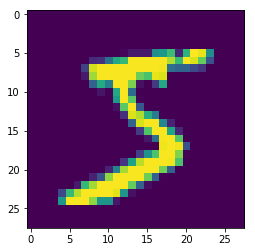

In [90]:
plt.imshow(x_train[0,:,:,0])

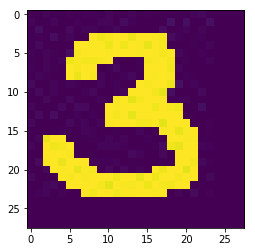

In [91]:
plt.imshow(x_reshaped[0,:,:,0])

In [92]:
pred = model.predict(x_reshaped)

In [93]:
print(pred)
np.argmax(pred)

[[1.6406145e-16 1.3871457e-10 2.8822851e-09 1.0000000e+00 4.6814401e-15
  3.7048170e-10 1.5589242e-16 3.7715753e-13 1.9877214e-11 6.5573228e-12]]


3

In [105]:
model.save('mnist_model.h5')